# Clusterização de angulação do fluxo de pessoas

In [29]:
import pandas as pd
import math
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('log_flow.csv')
df.head()

,frame,i,x1,y1,x2,y2,x,y,angle,size
0,1,0,830,117,830,122,0,-5,-1.570796,5.000000
1,1,1,984,557,987,557,-3,0,3.141593,3.000000
2,1,2,814,95,814,99,0,-4,-1.570796,4.000000
3,1,3,819,85,819,89,0,-4,-1.570796,4.000000
4,1,4,612,61,609,64,3,-3,-0.785398,4.242641


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51714 entries, 0 to 51713
Data columns (total 10 columns):
frame    51714 non-null int64
i        51714 non-null int64
x1       51714 non-null int64
y1       51714 non-null int64
x2       51714 non-null int64
y2       51714 non-null int64
x        51714 non-null int64
y        51714 non-null int64
angle    51714 non-null float64
size     51714 non-null float64
dtypes: float64(2), int64(8)
memory usage: 3.9 MB


### Distribuição dos dados

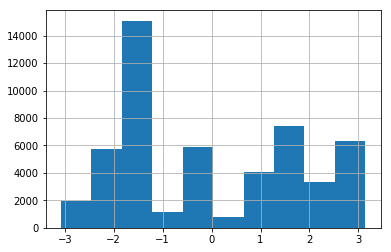

In [32]:
df.angle.hist()

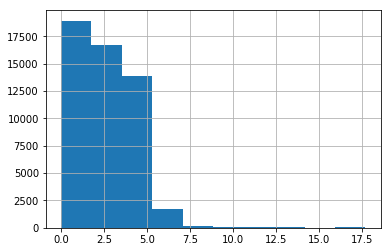

In [33]:
df['size'].hist()

# Clusterizacao do Angulo

In [47]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.externals import joblib

In [39]:
n_clusters=2
X = df[['angle']]

### Kmeans

In [40]:
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
kmeans.labels_

array([1, 0, 1, ..., 0, 0, 1], dtype=int32)

In [41]:
kmeans.cluster_centers_

array([[ 1.9769172 ],
       [-1.42754432]])

In [42]:
df['kmeans'] = kmeans.predict(X)

In [51]:
# save
joblib.dump(kmeans, 'kmeans.pkl') 
kmeans = joblib.load('kmeans.pkl') 
kmeans.predict(-1.4)[0]

1

### DBSCAN

In [43]:
dbscan = DBSCAN().fit(X)

In [45]:
labels = dbscan.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

1